In [1]:
from mmdet.apis import init_detector, inference_detector_parsing, show_result_pyplot
import mmcv
import numpy as np
import cv2
import os
from PIL import Image

/root/miniconda3/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
from visual import *

In [3]:
home_root = "/root/multi-parsing/"
data_root = "/root/data/LV-MHP-v2/"
#data_root = "/root/data/CHIP/"
#data_root = "/root/autodl-tmp/Densepose_CoCo/images/"

## UniParser

In [4]:
config_file = '../configs/repparsing/MHP_r50_fpn_half_gpu_3x_repparsing_DCN_fusion_metrics.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '/root/autodl-nas/Uniparser_3x_baseline.pth'

In [10]:
config_file = '../configs/repparsing/MHP_r101_fpn_half_gpu_3x_repparsing_DCN_fusion_metrics.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '/root/autodl-nas/Uniparser_3x_baseline_r101.pth'

In [38]:
config_file = '../configs/repparsing/CHIP_r101_fpn_half_gpu_6x_repparsing_DCN_fusion_metrics_noneg_cluster_light.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '/root/autodl-nas/UniParser_CIHP_r101_light.pth'

In [33]:
config_file = '../configs/repparsing/MHP_r101_fpn_half_gpu_3x_repparsing_DCN_fusion_metric_light.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '/root/autodl-nas/Uniparser_MHP_r101_light.pth'

## Model init

In [39]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /root/autodl-nas/UniParser_CIHP_r101_light.pth


2023-10-09 15:34:57,751 - root - INFO - ModulatedDeformConvPack backbone.layer2.0.conv2 is upgraded to version 2.
2023-10-09 15:34:57,755 - root - INFO - ModulatedDeformConvPack backbone.layer2.1.conv2 is upgraded to version 2.
2023-10-09 15:34:57,757 - root - INFO - ModulatedDeformConvPack backbone.layer2.2.conv2 is upgraded to version 2.
2023-10-09 15:34:57,759 - root - INFO - ModulatedDeformConvPack backbone.layer2.3.conv2 is upgraded to version 2.
2023-10-09 15:34:57,761 - root - INFO - ModulatedDeformConvPack backbone.layer3.0.conv2 is upgraded to version 2.
2023-10-09 15:34:57,764 - root - INFO - ModulatedDeformConvPack backbone.layer3.1.conv2 is upgraded to version 2.
2023-10-09 15:34:57,766 - root - INFO - ModulatedDeformConvPack backbone.layer3.2.conv2 is upgraded to version 2.
2023-10-09 15:34:57,768 - root - INFO - ModulatedDeformConvPack backbone.layer3.3.conv2 is upgraded to version 2.
2023-10-09 15:34:57,770 - root - INFO - ModulatedDeformConvPack backbone.layer3.4.conv2 

In [41]:
# test a single image
img = data_root + 'val/images/11790.jpg'
gt_name = "0000337-1.png"

result = inference_detector_parsing(model, img)

seg_masks = result[0]
if type(seg_masks) == list:
    seg_masks = np.array(seg_masks)
offset_vis = result[1]
score_list = result[2]

img_ori = mmcv.imread(img)

h,w,_ = img_ori.shape

random flip for chip dataset
save smantic masks:  0.007764339447021484
0.0791327953338623


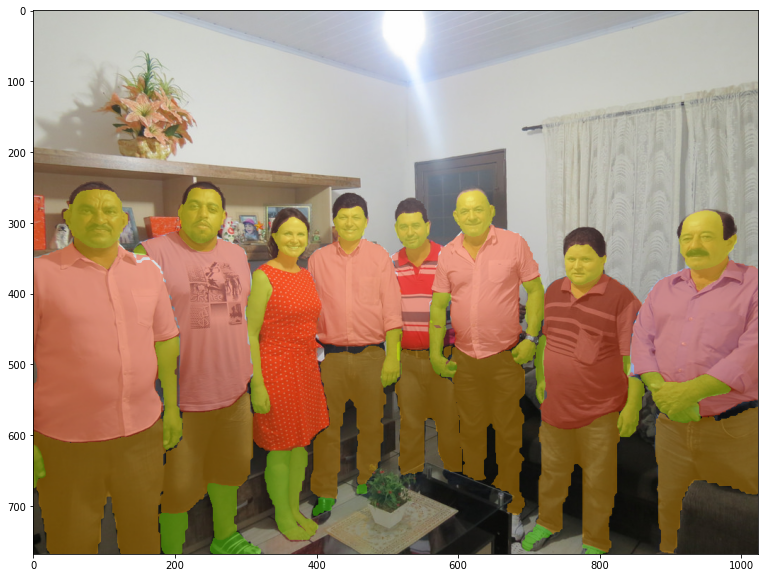

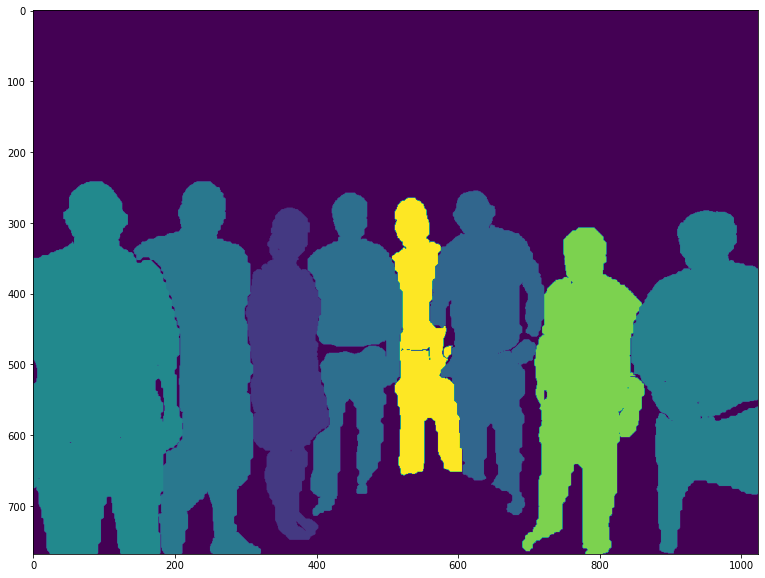

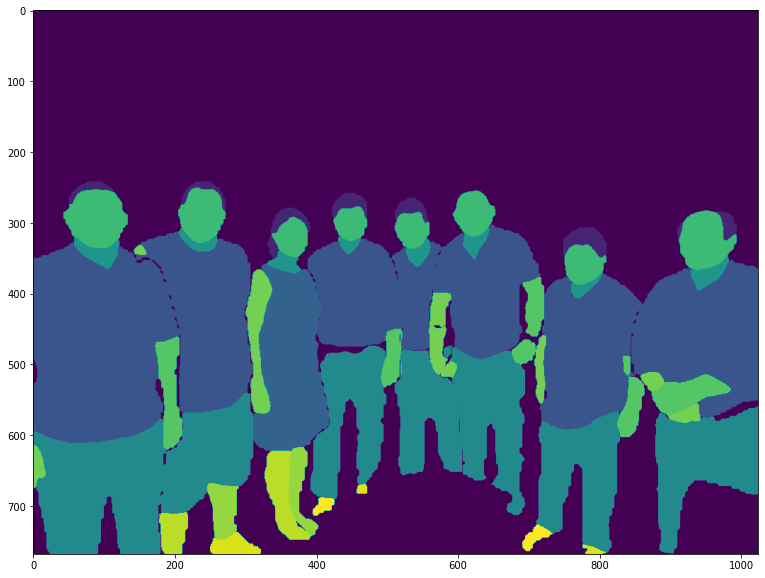

In [42]:
cobmine_img_and_seg(seg_masks, img, data_root)
seg_visual_human_in_one(seg_masks, img)
seg_visual_in_one(seg_masks, img)